This notebook contains an example for how to use the `taxbrain` python package

In [1]:
# # Install conda, taxbrain, and taxcalc if in Google Colab.
import sys
if 'google.colab' in sys.modules and 'taxbrain' not in sys.modules:
    # Install taxbrain and dependencies
    !pip install taxbrain &> /dev/null
    !pip install taxcalc &> /dev/null
    !pip install pypandoc &> /dev/null
    !pip install -U pandas &> /dev/null  # make sure pandas is up to date

In [2]:
from taxbrain import TaxBrain, differences_plot, distribution_plot

In [3]:
reform_url = "https://raw.githubusercontent.com/PSLmodels/Tax-Calculator/master/taxcalc/reforms/Larson2019.json"
start_year = 2021
end_year = 2030

# Static Reform

After importing the `TaxBrain` class from the `taxbrain` package, we initiate an instance of the class by specifying the start and end year of the anlaysis, which microdata to use, and a policy reform. Additional arguments can be used to specify econoimc assumptions and individual behavioral elasticites.

Once the class has been initiated, the `run()` method will handle executing each model

In [4]:
tb_static = TaxBrain(start_year, end_year, microdata="CPS", reform=reform_url)
tb_static.run()

Once the calculators have been run, you can produce a number of tables, including a weighted total of a given variable each year under both current law and the user reform.

In [5]:
print("Combined Tax Liability Over the Budget Window")
tb_static.weighted_totals("combined")

Combined Tax Liability Over the Budget Window


,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
Base,2.269727e+12,3.067767e+12,3.246623e+12,3.395728e+12,3.575938e+12,3.979716e+12,4.161639e+12,4.344151e+12,4.543397e+12,4.749701e+12
Reform,2.326818e+12,3.145972e+12,3.342312e+12,3.509844e+12,3.710034e+12,4.126726e+12,4.329940e+12,4.534780e+12,4.744452e+12,4.961574e+12
Difference,5.709077e+10,7.820500e+10,9.568834e+10,1.141166e+11,1.340957e+11,1.470099e+11,1.683013e+11,1.906291e+11,2.010544e+11,2.118730e+11


If you are interested in a detailed look on the reform's effect, you can produce a differences table for a given year.

In [6]:
print("Differences Table")
tb_static.differences_table(start_year, "weighted_deciles", "combined")

Differences Table


,count,tax_cut,perc_cut,tax_inc,perc_inc,mean,tot_change,share_of_change,ubi,benefit_cost_total,benefit_value_total,pc_aftertaxinc
0-10n,0.102049,0.000000,0.000000,0.035165,34.458500,8.218450,0.000839,0.001469,0.0,0.0,0.0,0.006305
0-10z,8.390627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
0-10p,12.214010,0.000000,0.000000,5.510201,45.113777,3.693062,0.045107,0.079009,0.0,0.0,0.0,-0.030271
10-20,20.708304,0.000000,0.000000,15.031974,72.589110,17.199769,0.356178,0.623880,0.0,0.0,0.0,-0.049703
20-30,20.706921,0.019010,0.091803,13.230015,63.891753,27.008003,0.559253,0.979585,0.0,0.0,0.0,-0.047439
30-40,20.707534,0.259493,1.253135,11.850040,57.225744,29.340367,0.607567,1.064212,0.0,0.0,0.0,-0.036801
40-50,20.706181,1.020739,4.929636,12.904516,62.322051,27.887624,0.577446,1.011453,0.0,0.0,0.0,-0.014320
50-60,20.708634,2.983512,14.407092,12.853635,62.068967,-36.541184,-0.756718,-1.325465,0.0,0.0,0.0,0.110734
60-70,20.707540,3.810788,18.402900,12.691879,61.291099,-155.091891,-3.211572,-5.625378,0.0,0.0,0.0,0.261506
70-80,20.705701,4.042144,19.521890,13.340665,64.429912,-198.758187,-4.115428,-7.208569,0.0,0.0,0.0,0.271550


TaxBrain comes with two (and counting) built in plots as well

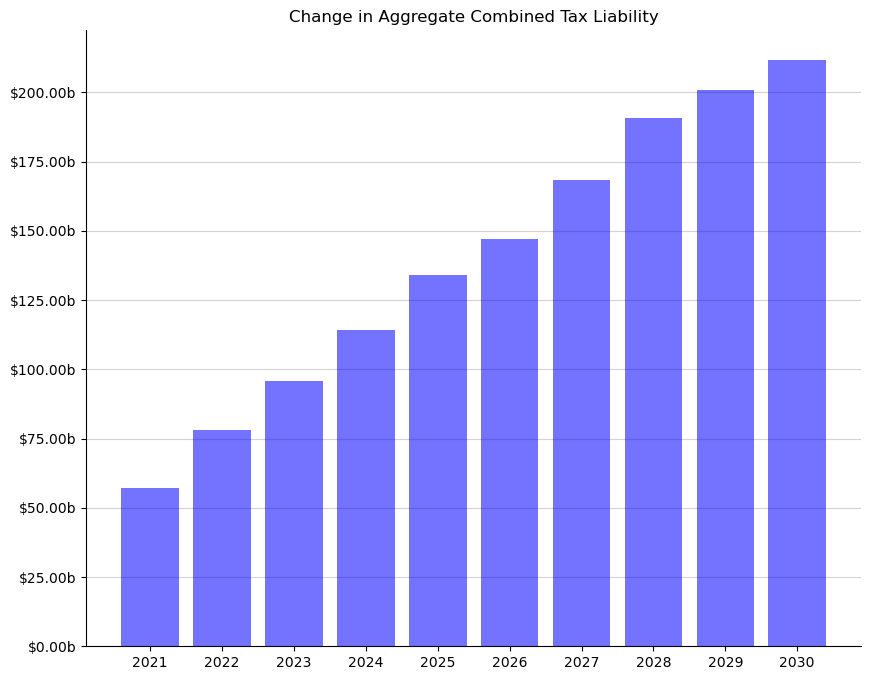

In [7]:
differences_plot(tb_static, 'combined', figsize=(10, 8));

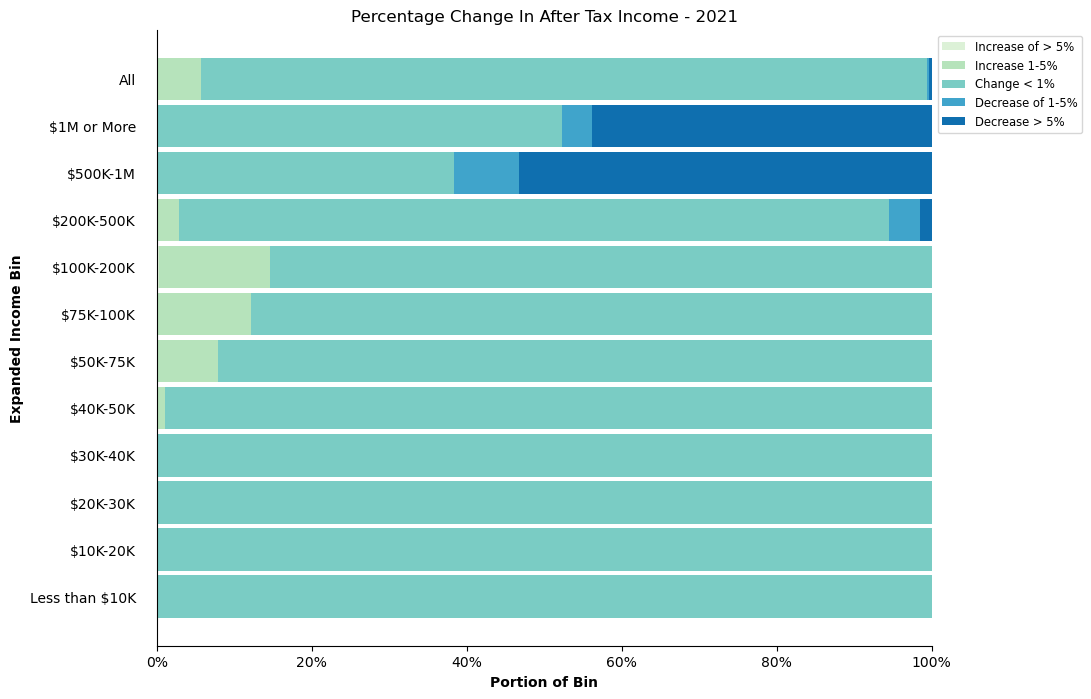

In [8]:
distribution_plot(tb_static, 2021, figsize=(10, 8));

You can run a partial-equlibrium dynamic simulation by initiating the TaxBrian instance exactly as you would for the static reform, but with your behavioral assumptions specified

In [9]:
tb_dynamic = TaxBrain(start_year, end_year, microdata="CPS", reform=reform_url,
                      behavior={"sub": 0.25})
tb_dynamic.run()

Once that finishes running, we can produce the same weighted total table as we did with the static run.

In [10]:
print("Partial Equilibrium - Combined Tax Liability")
tb_dynamic.weighted_totals("combined")

Partial Equilibrium - Combined Tax Liability


,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
Base,2.269727e+12,3.067767e+12,3.246623e+12,3.395728e+12,3.575938e+12,3.979716e+12,4.161639e+12,4.344151e+12,4.543397e+12,4.749701e+12
Reform,2.307804e+12,3.119395e+12,3.312243e+12,3.476774e+12,3.673491e+12,4.082934e+12,4.282357e+12,4.483171e+12,4.690507e+12,4.904587e+12
Difference,3.807725e+10,5.162814e+10,6.561941e+10,8.104634e+10,9.755272e+10,1.032176e+11,1.207186e+11,1.390202e+11,1.471100e+11,1.548863e+11


Or we can produce a distribution table to see details on the effects of the reform.

In [11]:
print("Distribution Table")
tb_dynamic.distribution_table(start_year, "weighted_deciles", "expanded_income", "reform")

Distribution Table


,count,c00100,count_StandardDed,standard,count_ItemDed,c04470,c04600,c04800,taxbc,c62100,...,othertaxes,refund,iitax,payrolltax,combined,ubi,benefit_cost_total,benefit_value_total,expanded_income,aftertax_income
0-10n,0.102049,-7.647952,0.018507,-5.835622,0.000000,0.000000,0.0,0.000000,0.000000,-7.764826,...,0.000000,0.354646,-0.354646,0.064998,-0.289648,0.0,0.799655,0.799655,-6.940854,-6.651206
0-10z,8.391348,-0.092134,8.391348,112.514735,0.000000,0.000000,0.0,0.000000,0.000000,-0.092134,...,0.000000,17.779859,-17.779859,0.000000,-17.779859,0.0,0.000000,0.000000,0.000000,17.779859
0-10p,12.213289,28.286909,12.207105,167.047672,0.006184,0.035899,0.0,0.109175,0.003643,28.250938,...,0.000000,28.404318,-28.400675,3.495389,-24.905286,0.0,19.592770,19.592770,50.389807,75.295093
10-20,20.707972,207.041657,20.230779,280.157298,0.472337,7.619006,0.0,25.986559,2.401345,200.049307,...,0.000000,68.924569,-66.523628,27.626076,-38.897552,0.0,107.290602,107.290602,323.220845,362.118396
20-30,20.707385,316.378323,19.648591,287.017567,1.053396,18.740597,0.0,116.225685,11.584224,299.238036,...,0.000000,67.787144,-56.195886,43.577393,-12.618493,0.0,258.441980,258.441980,590.805721,603.424214
30-40,20.707088,392.642544,19.510973,297.416383,1.187950,22.114507,0.0,184.988094,19.315954,371.147034,...,0.000000,67.101813,-47.772787,53.603619,5.830832,0.0,369.313918,369.313918,787.711190,781.880357
40-50,20.708472,550.480439,19.029242,307.522806,1.676905,33.455448,0.0,286.992712,30.516102,519.344714,...,0.000000,78.292375,-47.767104,72.879144,25.112041,0.0,404.535394,404.535394,994.589197,969.477157
50-60,20.707393,735.630028,18.331876,326.411031,2.373124,49.426182,0.0,425.521954,47.073700,691.665427,...,0.000000,93.114874,-46.034925,95.833407,49.798482,0.0,466.945896,466.945896,1258.080439,1208.281958
60-70,20.707515,959.511949,17.811997,357.787922,2.893239,62.644720,0.0,606.027111,72.245168,905.890709,...,0.000000,112.380798,-40.126138,122.146512,82.020374,0.0,578.376040,578.376040,1603.049167,1521.028793
70-80,20.707197,1365.708941,16.719155,373.852288,3.982463,98.050853,0.0,941.858952,119.044547,1288.034856,...,0.000000,121.724695,-2.658703,172.536431,169.877728,0.0,634.000703,634.000703,2085.339711,1915.461983


# Dynamic Reform with Corporate Income Tax Incidence

Now we simulate a dynamic revenue estimate while accounting for the incidence of a corporate income tax change.

In [12]:
# Corporate revenue estimate
corp_rev = [5_000_000_000] * (end_year - start_year + 1)
incidence_assumptions = {
    "Incidence": {  # long-run incidence of corporate tax
        "Labor share": 0.5,
        "Shareholder share": 0.4,
        "All capital share": 0.1,
    },
    "Long run years": 10,  # number of years to reach long-run incidence
}

In [13]:
tb_dynamic = TaxBrain(start_year, end_year, microdata="CPS", reform=reform_url,
                      behavior={"sub": 0.25},
                      corp_revenue=corp_rev,
                      corp_incidence_assumptions=incidence_assumptions)
tb_dynamic.run()

In [14]:
print("Partial Equilibrium - Combined Tax Liability")
tb_dynamic.weighted_totals("combined")

Partial Equilibrium - Combined Tax Liability


,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
Base,2.269727e+12,3.067767e+12,3.246623e+12,3.395728e+12,3.575938e+12,3.979716e+12,4.161639e+12,4.344151e+12,4.543397e+12,4.749701e+12
Reform,2.309448e+12,3.121009e+12,3.313788e+12,3.478349e+12,3.675071e+12,4.084663e+12,4.284063e+12,4.484873e+12,4.692225e+12,4.906309e+12
Difference,3.972134e+10,5.324191e+10,6.716455e+10,8.262134e+10,9.913307e+10,1.049468e+11,1.224239e+11,1.407223e+11,1.488282e+11,1.566081e+11
